In [2]:
## pandasを使って収集したデータについて軽く調べてみます。
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

data = pd.read_csv( 'player_world_stats.csv' ,index_col=0)
data = data.drop_duplicates(subset='name')

print(data.columns)
data = data[['name', 'Born','Span','Position','Mat','Start','Sub','Pts','Tries','Conv','Pens','Drop','%','Height','Weight']]

temp_span_year = []
temp_span_start = []
temp_span_end = []

for span in data.Span:
    texts = span.split("-")
    temp_span_year.append(int(texts[1]) - int(texts[0]) + 1)
    temp_span_start.append(int(texts[0]))
    temp_span_end.append(int(texts[1]))


data["Span"] = temp_span_year
data["SpanStart"] = temp_span_start
data["SpanEnd"] = temp_span_end

temp_born = []
for born in data.Born:
    result = re.search('1\d{3}', str(born))
    if result is not None:
        temp_born.append(int(result.group()))
    else:
        temp_born.append(0)

data["BornYear"] = temp_born

temp_weight = []
for weight in data.Weight:
    result = str(weight).replace(' lb','')
    temp_weight.append(0.45359237 * float(result))

data["Weight"] = temp_weight

temp_height = []

for height in data.Height:
    texts = str(height).split(" ")
    height_data = 0
    if len(texts) >= 3:        
        height_data = (float(texts[0]) * 12 + float(texts[2])) * 2.54

    temp_height.append(height_data)

data["Height"] = temp_height

data["BMI"] = data["Weight"] / ((data["Height"] / 100) ** 2)
data["NewBMI"] = 1.3 * data["Weight"] / ((data["Height"] / 100) ** 2.5)
data["diffBMI"] = data["NewBMI"] - data["BMI"]


data.head()
data.describe()

Index(['name', 'Full name', 'Born', 'Major teams', 'Position', 'Span', 'Mat',
       'Start', 'Sub', 'Pts', 'Tries', 'Conv', 'Pens', 'Drop', 'GfM', 'Won',
       'Lost', 'Draw', '%', 'Died', 'Height', 'Weight', 'Current age', 'Other',
       'Relations', 'Nickname', 'Also known as', 'Goals', 'Links'],
      dtype='object')


,Span,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,SpanStart,SpanEnd,BornYear,BMI,NewBMI,diffBMI
count,15084.000000,15084.000000,15084.000000,15084.000000,14512.000000,15084.000000,15084.000000,15084.000000,15084.000000,15084.000000,15084.000000,6120.000000,15084.000000,15084.000000,15084.000000,6114.000000,6114.000000,6107.000000
mean,3.623243,10.618868,8.858592,1.760276,11.961756,1.424490,0.924954,1.021811,0.100570,47.855709,74.612584,97.829943,1967.368271,1969.991514,1589.387894,inf,inf,-1.202351
std,3.277361,15.935014,13.689546,4.279494,49.394087,3.631824,7.315015,8.875523,0.820591,32.683397,90.578878,14.600169,39.122647,39.807853,751.603232,NaN,NaN,0.601525
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1871.000000,1871.000000,0.000000,13.992614,13.007086,-3.069135
25%,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,87.089735,1936.000000,1938.000000,1876.000000,26.448563,25.419176,-1.612686
50%,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,97.975952,1977.000000,1980.000000,1939.000000,28.312463,26.987578,-1.191346
75%,5.000000,12.000000,10.000000,1.000000,8.000000,1.000000,0.000000,0.000000,0.000000,70.000000,182.880000,108.862169,2000.000000,2004.000000,1975.000000,30.562004,29.203949,-0.805466
max,21.000000,148.000000,141.000000,55.000000,1598.000000,69.000000,293.000000,281.000000,36.000000,100.000000,213.360000,179.622579,2018.000000,2018.000000,1999.000000,inf,inf,1.568335


In [12]:
data = data.query('Weight > 0')
data = data.query('Height > 0')
data = data.dropna(subset=['Position'])

new_data = pd.DataFrame()

for index, row in data.iterrows():        
    values = []
    for column in data.columns:
        values.append(row[column])
    
    series = pd.Series(values, index=data.columns)
    for position in str(row['Position']).split(','):
        copy_series = series.copy()
        copy_series['Position'] = str.strip(position)
        new_data = new_data.append(copy_series, ignore_index = True)

new_data = new_data[['name', 'Born','Span','Position','Mat','Start','Sub','Pts','Tries','Conv','Pens','Drop','%','Height','Weight','SpanEnd']]
new_data.describe()

,Span,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,SpanEnd
count,6742.000000,6742.000000,6742.000000,6742.000000,6729.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000
mean,4.517651,17.353753,13.434589,3.919163,22.672462,2.548354,1.880451,2.050578,0.148176,52.563656,184.059205,97.358469,1999.182438
std,3.637795,21.291470,18.395774,5.851433,72.737227,5.148352,11.180026,13.412071,1.069945,29.061291,7.921979,14.251213,24.277593
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.940000,53.523900,1904.000000
25%,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.330000,177.800000,86.636143,1998.000000
50%,3.000000,9.000000,6.000000,2.000000,5.000000,1.000000,0.000000,0.000000,0.000000,50.000000,182.880000,97.522360,2007.000000
75%,7.000000,24.000000,18.000000,5.000000,16.000000,3.000000,0.000000,0.000000,0.000000,70.562500,187.960000,107.954984,2015.000000
max,18.000000,148.000000,141.000000,55.000000,1598.000000,69.000000,293.000000,281.000000,36.000000,100.000000,213.360000,151.499852,2018.000000


In [13]:
grouped = new_data.groupby('Position')
grouped.describe()

%                                                         \
              count       mean        std    min      25%     50%      75%   
Position                                                                     
Back-row      438.0  53.050183  27.516324   0.00  35.7100  50.695  66.6600   
Centre        897.0  52.190468  29.502502   0.00  33.3300  50.000  71.4200   
Five-eighth     8.0  83.778750  14.009022  60.00  75.0000  84.285  93.7450   
Flanker       578.0  52.784291  30.779818   0.00  33.3300  50.835  73.4725   
Fly-half      467.0  53.501328  29.252549   0.00  35.2900  52.940  71.4200   
Forward         1.0  64.280000        NaN  64.28  64.2800  64.280  64.2800   
Front-row       1.0  42.850000        NaN  42.85  42.8500  42.850  42.8500   
Fullback      431.0  53.685406  27.729547   0.00  36.9300  50.000  69.3350   
Halfback       11.0  31.736364  27.441974   0.00   7.1400  30.000  54.1650   
Hooker        480.0  54.673187  27.918346   0.00  38.3825  51.830  71.1875   
Lock          826.0  50.758511  28.993126   0.00  33.3300  50.000  68.7500   
No. 8         261.0  52.215517  27.919480   0.00  37.5000  52.940  68.1800   
Outside back    7.0  51.085714  31.553150   0.00  37.5000  60.000  61.3000   
Prop          986.0  52.120497  28.830359   0.00  33.3300  50.000  70.0000   
Scrum-half    464.0  53.039806  30.094628   0.00  33.3300  53.740  74.0100   
Utility back   50.0  54.815400  30.825988   0.00  33.5500  55.840  71.3525   
Wing          836.0  52.244581  29.320492   0.00  33.3300  50.000  71.4200   

                       Conv                ...     Tries       Weight  \
                 max  count       mean     ...       75%   max  count   
Position                                   ...                          
Back-row      100.00  438.0   0.013699     ...      3.00  25.0  438.0   
Centre        100.00  897.0   1.172798     ...      5.00  47.0  897.0   
Five-eighth   100.00    8.0   1.250000     ...      5.25   9.0    8.0   
Flanker       100.00  578.0   0.079585     ...      2.00  27.0  578.0   
Fly-half      100.00  467.0  15.516060     ...      3.00  31.0  467.0   
Forward        64.28    1.0   0.000000     ...      0.00   0.0    1.0   
Front-row      42.85    1.0   0.000000     ...      1.00   1.0    1.0   
Fullback      100.00  431.0   5.603248     ...      5.00  46.0  431.0   
Halfback       75.00   11.0   0.090909     ...      0.50   2.0   11.0   
Hooker        100.00  480.0   0.043750     ...      2.00  17.0  480.0   
Lock          100.00  826.0   0.058111     ...      2.00  26.0  826.0   
No. 8         100.00  261.0   0.003831     ...      3.00  32.0  261.0   
Outside back  100.00    7.0   0.000000     ...      7.50  30.0    7.0   
Prop          100.00  986.0   0.023327     ...      1.00  14.0  986.0   
Scrum-half    100.00  464.0   1.653017     ...      3.00  38.0  464.0   
Utility back  100.00   50.0   7.840000     ...      9.00  41.0   50.0   
Wing          100.00  836.0   0.777512     ...      6.00  69.0  836.0   

                                                                         \
                    mean        std         min         25%         50%   
Position                                                                  
Back-row      104.999384   8.058894   75.749926  100.697506  105.687022   
Centre         91.358156   9.985853   63.502932   85.275366   92.532843   
Five-eighth    90.378280   9.158106   78.017888   85.388764   90.718474   
Flanker        98.402862   9.829622   68.038855   92.986436   99.790321   
Fly-half       84.338071   8.395836   59.874193   79.378665   85.728958   
Forward       104.779837        NaN  104.779837  104.779837  104.779837   
Front-row     100.697506        NaN  100.697506  100.697506  100.697506   
Fullback       86.577207   8.391437   63.049339   81.419830   86.636143   
Halfback       76.285989   7.988425   64.863709   71.894391   75.749926   
Hooker        101.360885  10.252262   69.399633   95.707990  102.511876   
Lock          108.998

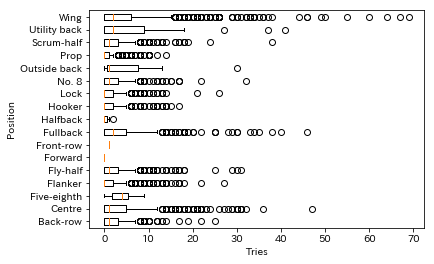

In [4]:
Y = []
labels = []
for group in grouped:
    labels.append(group[0])
    Y.append(group[1]['Tries'])
    
fig,ax = plt.subplots()
ax.boxplot(Y,labels=labels,vert=False)
plt.xlabel('Tries')
plt.ylabel('Position')
plt.show()

In [18]:
temp = new_data
df = temp[['Position','name','Tries','Mat','Height','Weight','SpanEnd']]
df['TriesPerMat'] = df['Tries'] / df['Mat']
df_groupby = df.groupby("Position",as_index=False)
df_groupby.mean().sort_values('TriesPerMat', ascending=False)

/Users/rim/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Position,Tries,Mat,Height,Weight,SpanEnd,TriesPerMat
12,Outside back,6.714286,17.285714,186.145714,97.327963,2007.428571,0.435588
16,Wing,5.480861,15.165072,181.452010,88.276888,1997.534689,0.327522
15,Utility back,5.980000,24.260000,181.457600,88.677308,2006.560000,0.271231
2,Five-eighth,3.875000,18.250000,182.562500,90.378280,1995.750000,0.232024
7,Fullback,4.185615,17.668213,181.754385,86.577207,1999.206497,0.222440
1,Centre,3.481605,16.215162,181.877592,91.358156,1999.365663,0.191776
6,Front-row,1.000000,7.000000,175.260000,100.697506,2008.000000,0.142857
11,No. 8,2.590038,18.348659,189.692261,104.435733,1994.455939,0.130114
4,Fly-half,2.430407,18.736617,178.740942,84.338071,1997.044968,0.114349
14,Scrum-half,2.230603,18.351293,175.320216,81.327939,2000.849138,0.111393


In [19]:
temp = df.query('Mat > 40 & SpanEnd == 2018')
temp = temp.sort_values('TriesPerMat', ascending=False)
temp.head(10)

,Position,name,Tries,Mat,Height,Weight,SpanEnd,TriesPerMat
757,Wing,DTH van der Merwe,32.0,52.0,182.88,91.625659,2018.0,0.615385
5328,Flanker,Rohan Kitshoff,22.0,42.0,180.34,97.975952,2018.0,0.523810
5307,Fullback,Chrysander Botha,28.0,55.0,185.42,93.893621,2018.0,0.509091
543,Fullback,Israel Folau,35.0,71.0,193.04,102.965468,2018.0,0.492958
1076,Fullback,Chris Ashton,20.0,41.0,182.88,95.254398,2018.0,0.487805
4621,Wing,George North,36.0,81.0,193.04,108.862169,2018.0,0.444444
3637,Wing,Ben Smith,33.0,75.0,185.42,92.986436,2018.0,0.440000
3655,Fly-half,Beauden Barrett,31.0,71.0,187.96,90.718474,2018.0,0.436620
3910,Wing,Tommy Seymour,19.0,45.0,182.88,93.893621,2018.0,0.422222
3315,No. 8,Hendrik Tui,17.0,41.0,187.96,107.954984,2018.0,0.414634


In [24]:
temp = new_data.query('Mat > 40 & SpanEnd == 2018')
df = temp[['Position','name','Tries','Mat','Height','Weight','SpanEnd']]
df['TriesPerMat'] = df['Tries'] / df['Mat']
df_groupby = df.groupby("Position",as_index=False)
df_groupby.mean().sort_values('TriesPerMat', ascending=False)

/Users/rim/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Position,Tries,Mat,Height,Weight,SpanEnd,TriesPerMat
11,Wing,22.666667,64.222222,185.137778,94.095217,2018.0,0.356084
4,Fullback,18.153846,68.307692,184.443077,90.160206,2018.0,0.281422
10,Utility back,18.666667,88.333333,182.033333,93.440028,2018.0,0.232669
1,Centre,11.000000,56.588235,184.523529,98.963182,2018.0,0.195763
7,No. 8,11.600000,69.200000,192.024000,115.031025,2018.0,0.193788
3,Fly-half,9.750000,63.333333,183.515000,90.151484,2018.0,0.155366
2,Flanker,8.800000,60.000000,187.198000,106.231333,2018.0,0.154561
9,Scrum-half,9.000000,74.842105,177.131579,83.246137,2018.0,0.116631
0,Back-row,7.050000,66.950000,191.262000,107.002440,2018.0,0.100410
5,Hooker,5.588235,67.588235,180.937647,104.673110,2018.0,0.085724


In [23]:
temp = new_data.query('SpanEnd == 2018 & Position == "Outside back"')
temp.head()

,name,Born,Span,Position,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,SpanEnd
5029,Semi Radradra Waqavatu,"July 13, 1992, Suva",1.0,Outside back,2.0,2.0,0.0,10.0,2.0,0.0,0.0,0.0,50.0,190.5,109.769354,2018.0


In [12]:
pd.set_option('display.max_columns', 100)
temp = data[data['name'].str.contains('Johnny Sexton')]

temp.head()

,name,Born,Span,Position,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,SpanStart,SpanEnd,BornYear,BMI,NewBMI,diffBMI
5767,Johnny Sexton,"July 11, 1985, Dublin",10,Fly-half,83,73,10,732.0,10,92,162,4,59.63,187.96,91.625659,2009,2018,1985,25.934999,24.592171,-1.342828
